In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('Amazon Sale Report.csv')

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
df.set_index('index', inplace = True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128942.0,463966.236509,191476.764941,110001.0,382421.0,500033.0,600024.0,989898.0


In [8]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [9]:
df.shape

(128975, 23)

In [10]:
df['sale']=df['Amount']*df['Qty']

In [11]:
df.head()     #sale as target variable

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,sale
index,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,0.0
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,406.0
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,329.0
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,0.0
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,574.0


In [12]:
df.isnull().sum()/len(df)*100

Order ID               0.000000
Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
ASIN                   0.000000
Courier Status         5.328164
Qty                    0.000000
currency               6.043807
Amount                 6.043807
ship-city              0.025586
ship-state             0.025586
ship-postal-code       0.025586
ship-country           0.025586
promotion-ids         38.110487
B2B                    0.000000
fulfilled-by          69.546811
Unnamed: 22           38.030626
sale                   6.043807
dtype: float64

In [13]:
df['sale']=df['sale'].astype("float")

<AxesSubplot: xlabel='sale', ylabel='Density'>

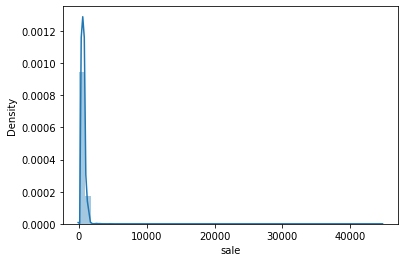

In [14]:
sns.distplot(df['sale'])

In [15]:
df['sale']=df['sale'].fillna(df['sale'].median())

In [16]:
df.nunique()

Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
sale                     925
dtype: int64

In [17]:
df.apply(pd.unique)

Order ID              [405-8078784-5731545, 171-9198151-1101146, 404...
Date                  [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...
Status                [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                           [Merchant, Amazon]
Sales Channel                                   [Amazon.in, Non-Amazon]
ship-service-level                                [Standard, Expedited]
Style                 [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
SKU                   [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
Category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
Size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
ASIN                  [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
Courier Status                     [nan, Shipped, Cancelled, Unshipped]
Qty                                    [0, 1, 2, 15, 3, 9, 13, 5, 4, 8]
currency                                                     [IN

In [18]:
df.drop(columns = ['Unnamed: 22','fulfilled-by','ship-country', 'currency','Sales Channel '], inplace = True)

In [19]:
before_remove_duplicates = len(df)

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df[df.isnull().any(axis = 1)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,sale
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False,0.0
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False,0.0
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False,574.0
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,597.0
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.00,Chennai,TAMIL NADU,600041.0,NaN,False,363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Expedited,SET224,SET224-KR-NP-XS,Set,XS,B08MXDBRK1,Shipped,1,1132.00,CHENNAI 600042,TAMIL NADU,600042.0,NaN,False,1132.0
128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Expedited,JNE3638,JNE3638-KR-XS,kurta,XS,B09814Q3QH,Cancelled,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN,False,597.0
128969,404-3802633-7250760,05-31-22,Cancelled,Amazon,Expedited,SET044,SET044-KR-NP-M,Set,M,B07Q2RTSFB,Unshipped,1,612.00,MUMBAI,MAHARASHTRA,400017.0,NaN,False,612.0


In [22]:
after_remove_duplicates = len(df)
duplicate_rows_removed = before_remove_duplicates - after_remove_duplicates
print(f'{duplicate_rows_removed} duplicate rows have been removed! \nThe Dataset now has {after_remove_duplicates} rows.')

6 duplicate rows have been removed! 
The Dataset now has 128969 rows.


In [23]:
df[df['promotion-ids'].isnull()]
df['promotion-ids'].fillna('no promotion', inplace = True)
df['Courier Status'].fillna('unknown', inplace = True)
df[df['Amount'].isnull()]
df['Amount'].fillna(0, inplace = True)

In [24]:
df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,sale
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False,0.0
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False,406.0
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True,329.0
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,False,0.0
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,False,574.0


In [25]:
df[df['ship-city'].isnull()]


,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,sale
index,,,,,,,,,,,,,,,,,,,
1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,493.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,493.0
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,458.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,458.0
8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Expedited,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,1,432.0,NaN,NaN,NaN,no promotion,False,432.0
11215,402-0107720-7057168,04-23-22,Shipped,Amazon,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,654.0
13252,407-4532637-8415521,04-22-22,Cancelled,Merchant,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,unknown,0,380.0,NaN,NaN,NaN,no promotion,False,0.0
15688,404-9229894-8608305,04-21-22,Shipped,Amazon,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Shipped,1,442.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,442.0
16787,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,B07GPGP46N,Shipped,1,376.0,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False,376.0
18351,405-4927647-8064368,04-19-22,Shipped,Amazon,Expedited,J0230,J0230-SKD-XS,Set,XS,B08XNHXSFZ,Shipped,1,1112.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,1112.0
22930,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Standard,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False,654.0


In [26]:
df['ship-city'].fillna('unknown', inplace = True)
df['ship-state'].fillna('unknown', inplace = True)
df['ship-postal-code'].fillna('unknown', inplace = True)
df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,sale
index,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False,0.0
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False,406.0
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True,329.0
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,False,0.0
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,False,574.0


In [27]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df['month'] = df['Date'].dt.month
df['month'].unique()

array([4, 3, 5, 6], dtype=int64)

In [29]:
df['Date'].max()


Timestamp('2022-06-29 00:00:00')

In [30]:
df['Date'].min()

Timestamp('2022-03-31 00:00:00')

In [31]:
months = ['march','April', 'May', 'June']
df['month'].replace([3,4,5,6],months, inplace = True)

In [32]:
df.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,sale,month
index,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False,0.0,April
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False,406.0,April
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True,329.0,April
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,False,0.0,April
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,False,574.0,April


In [33]:
df['sale'].unique()

array([    0.,   406.,   329.,   574.,   824.,   653.,   399.,   597.,
         363.,   685.,   364.,   657.,   771.,   544.,   458.,   886.,
         517.,   666.,   376.,   499.,   582.,   299.,   459.,   791.,
        1233.,   487.,   368.,   699.,   885.,   424.,  1126.,   788.,
         759.,  1146.,   665.,   429.,   848.,   654.,  1033.,   390.,
         493.,   721.,   888.,   353.,   599.,   518.,   295.,   852.,
         909.,   432.,   545.,   696.,   631.,   316.,   362.,   751.,
         684.,  1281.,  1186.,   377.,   744.,   859.,   825.,   680.,
         725.,  1338.,   472.,   832.,   692.,   318.,   807.,   311.,
         387.,   348.,   549.,   635.,   790.,   375.,  1115.,   579.,
         442.,   690.,  1399.,   999.,   496.,   845.,   568.,   484.,
         626.,   563.,   512.,  1112.,   583.,   534.,   319.,   795.,
         588.,   497.,   449.,   463.,   591.,   435.,  1099.,   533.,
         968.,   486.,  1065.,  4260.,   682.,  1140.,   660.,   345.,
      

In [34]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [35]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
sale                  0
month                 0
dtype: int64

# EDA (Exploratory data analysis)

<AxesSubplot: xlabel='Fulfilment', ylabel='count'>

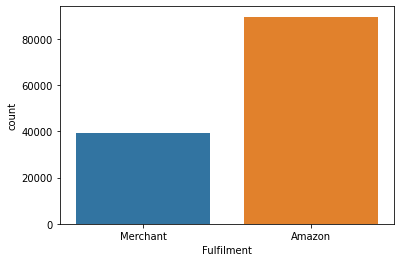

In [36]:
sns.countplot(x=df['Fulfilment'],data=df)

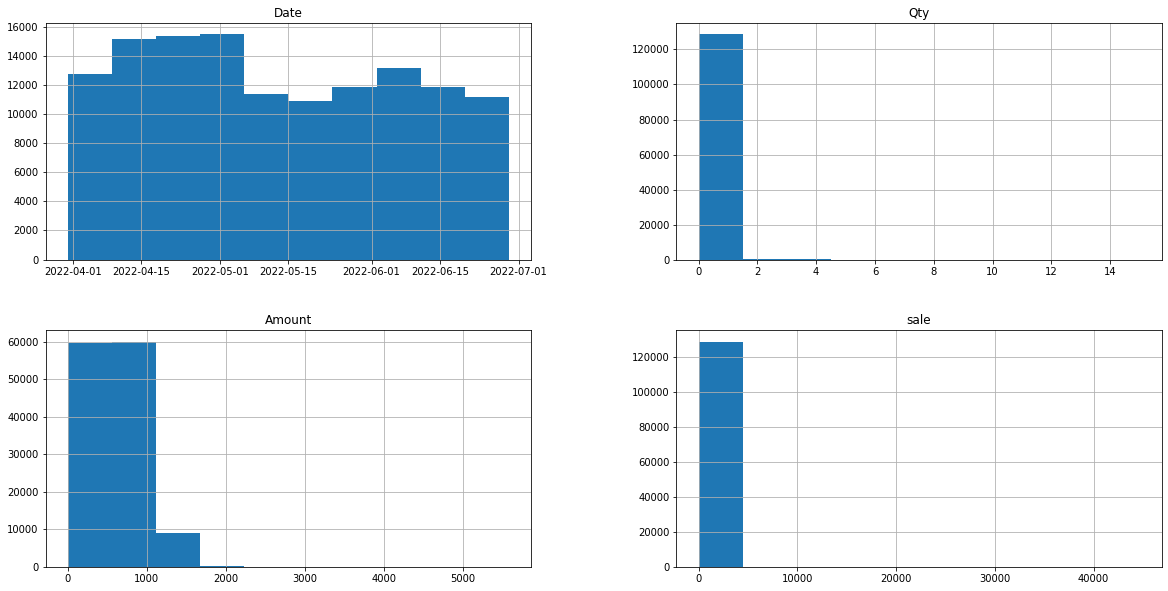

In [37]:
p=df.hist(figsize=(20,10))

<AxesSubplot: xlabel='Qty', ylabel='count'>

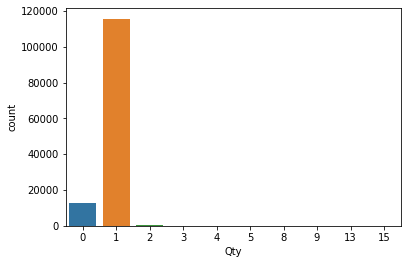

In [8]:
sns.countplot(x=df['Qty'],data=df)

<AxesSubplot: >

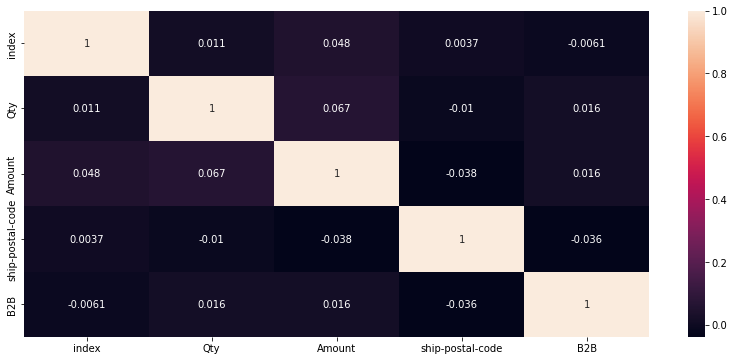

In [11]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)

In [38]:
df.drop(['Order ID','ship-postal-code'],axis=1,inplace=True)

In [39]:
cat_cols=df.select_dtypes(include='O').columns
cat_cols

Index(['Status', 'Fulfilment', 'ship-service-level', 'Style', 'SKU',
       'Category', 'Size', 'ASIN', 'Courier Status', 'ship-city', 'ship-state',
       'promotion-ids', 'month'],
      dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [41]:
df.drop(['Date','B2B'],axis=1,inplace=True)

In [42]:
df.head()

,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,promotion-ids,sale,month
0,0,1,1,1342,6992,5,7,5563,3,0,647.62,4795,28,5787,0.0,0
1,5,1,1,847,4436,8,0,5277,1,1,406.00,776,23,2051,406.0,0
2,3,0,0,533,2633,8,8,675,1,1,329.00,5353,28,5766,329.0,0
3,0,1,1,373,1767,7,5,4638,3,0,753.33,6140,43,5787,0.0,0
4,3,0,0,754,3837,6,0,4351,1,1,574.00,1466,56,5787,574.0,0


In [43]:
for i in df.columns:
    print(i)
    print(df[i].unique())

Status
[ 0  5  3 10  9  6  7 11  8  1  2  4 12]
Fulfilment
[1 0]
ship-service-level
[1 0]
Style
[1342  847  533 ... 1118  335 1109]
SKU
[6992 4436 2633 ... 2629 3876 5628]
Category
[5 8 7 6 3 1 4 0 2]
Size
[ 7  0  8  5 10  9  3  6  1  2  4]
ASIN
[5563 5277  675 ...  824 3791  385]
Courier Status
[3 1 0 2]
Qty
[ 0  1  2 15  3  9 13  5  4  8]
Amount
[ 647.62  406.    329.   ...  708.58 1244.    639.  ]
ship-city
[4795  776 5353 ... 2598 6425 2938]
ship-state
[28 23 43 56 59 10 57  1 49 14 19  5 22 11 39 24 27 61 35 18 60  8 21 44
 20  4 29 17 30 16 58 25 13 54 15 69  0 47 52 32 67 40 36  9 31 66 38 51
 48 46 63 50 12 65 26 64 42  2  6  3 45 55  7 37 62 34 68 41 53 33]
promotion-ids
[5787 2051 5766 ... 2621 3053  893]
sale
[    0.   406.   329.   574.   824.   653.   399.   597.   363.   685.
   364.   657.   771.   544.   458.   886.   517.   666.   376.   499.
   582.   299.   459.   791.  1233.   487.   368.   699.   885.   424.
  1126.   788.   759.  1146.   665.   429.   848.   654. 

# spliting data into train and test data

In [44]:
X=df.drop(["sale"],axis=1)
y=df["sale"]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [47]:
X_train.shape 

(103175, 15)

In [48]:
X_test.shape

(25794, 15)

In [49]:
y_train.shape

(103175,)

In [50]:
y_test.shape

(25794,)

In [51]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# score=cross_val_score(rf,X,y,cv=skf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Validation score :{}".format(score.mean()))

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
gb=GradientBoostingRegressor()

In [54]:
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [55]:
y_train_pred=gb.predict(X_train)
y_test_pred=gb.predict(X_test)

In [56]:
from sklearn.metrics import r2_score,mean_squared_error


In [57]:
print("Train Data")
print("R2 Score:",r2_score(y_train,y_train_pred))
print("MSE",mean_squared_error(y_train,y_train_pred))
print("Test Data")
print("R2 Score:",r2_score(y_test,y_test_pred))
print("MSE",mean_squared_error(y_test,y_test_pred))

Train Data
R2 Score: 0.9939983743922809
MSE 807.849363697781
Test Data
R2 Score: 0.9875044226841924
MSE 1225.4048658550125


In [58]:
params={'n_estimators':200,'max_depth':12,'learning_rate':0.03,'min_samples_leaf':16,'min_samples_split':10}

In [59]:
gb1=GradientBoostingRegressor(**params)

In [60]:
gb1.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=12, min_samples_leaf=16,
                          min_samples_split=10, n_estimators=200)

In [61]:
y_train_pred1=gb1.predict(X_train)
y_test_pred1=gb1.predict(X_test)

In [62]:
print("Train Data")
print("R2 Score:",r2_score(y_train,y_train_pred1))
print("MSE",mean_squared_error(y_train,y_train_pred1))
print("Test Data")
print("R2 Score:",r2_score(y_test,y_test_pred1))
print("MSE",mean_squared_error(y_test,y_test_pred1))

Train Data
R2 Score: 0.9215766341643712
MSE 10556.184329103551
Test Data
R2 Score: 0.9875221349063602
MSE 1223.6678798254013


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
model1=LinearRegression()
model2=RandomForestRegressor()
model3=AdaBoostRegressor()
model4=SVR()
model5= GradientBoostingRegressor()
model6=XGBRegressor()

In [64]:
from sklearn.metrics import r2_score,mean_squared_error

In [65]:
def my_model(model):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    print('Train Data')
    r2=r2_score(y_train,y_pred_train)
    RMSE=np.sqrt(mean_squared_error(y_train,y_pred_train))
    print("R2 score:{}|RMSE: {}".format(round(r2,2),round(RMSE,2)))
    print('Test Data')
    r2_test=r2_score(y_test,y_pred_test)
    RMSE_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
    print("R2 score:{}|RMSE: {}".format(round(r2_test,2),round(RMSE_test,2)))
    return model
#     print("Train Data")
#     print("R2_Score:",r2_score(y_train,y_train_pred1))
#     print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred_train))
#     print("Test Data")
#     print("R2_Score:",r2_score(y_test,y_pred_test))
#     print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_test))

In [66]:
for i in [model1,model2,model3,model4,model5,model6]:
    print('when model is',i)
    my_model(i)
    print('*'*90)

when model is LinearRegression()
Train Data
R2 score:0.62|RMSE: 225.47
Test Data
R2 score:0.75|RMSE: 156.77
******************************************************************************************
when model is RandomForestRegressor()
Train Data
R2 score:0.99|RMSE: 40.36
Test Data
R2 score:0.98|RMSE: 43.54
******************************************************************************************
when model is AdaBoostRegressor()
Train Data
R2 score:0.7|RMSE: 201.37
Test Data
R2 score:0.58|RMSE: 202.89
******************************************************************************************
when model is SVR()
Train Data
R2 score:0.33|RMSE: 301.41
Test Data
R2 score:0.42|RMSE: 237.88
******************************************************************************************
when model is GradientBoostingRegressor()
Train Data
R2 score:0.99|RMSE: 28.42
Test Data
R2 score:0.99|RMSE: 33.54
******************************************************************************************
when mod

In [67]:
param_grid={
    'n_estimators':[50,100,200,300,500,1000],
    'learning_rate':[0,0.0001,0.001,0.1,1],
    "loss" : ['linear', 'square', 'exponential']
}

In [68]:
from sklearn.model_selection import RandomizedSearchCV 

In [69]:
param_grid=RandomizedSearchCV(model3,param_distributions=param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5)

In [70]:
my_model(param_grid)

Train Data
R2 score:0.8|RMSE: 162.03
Test Data
R2 score:0.73|RMSE: 161.81


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0, 0.0001, 0.001, 0.1,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 200, 300, 500,
                                                         1000]},
                   scoring='neg_mean_squared_error')